In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
runs = ELPH_utils.load_runs()

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

100 loaded with n_kmax = 80


runs[0] shape:  (80, 400)


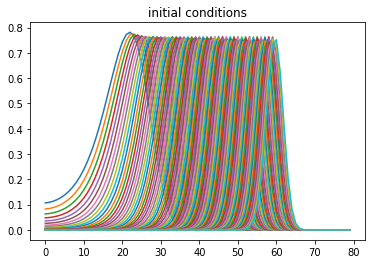

In [3]:
print('runs[0] shape: ', runs[0].shape)

for k in range(n_runs):
    plt.plot(runs[k][:,0])

plt.title('initial conditions')
plt.show()

0.5620935888772141


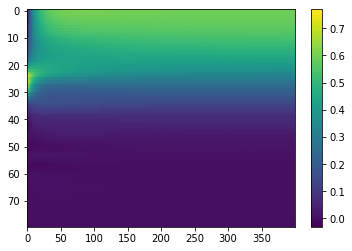

In [5]:
from ELPH_SVDAPPRX import SVDAPPRX

model = SVDAPPRX(runs)
model.train()

recon = model.approx_single_run(runs[7], rdim = 10)

print(model.get_error(runs[7], rdim=10))

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

In [6]:
m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20}, score_kwargs={'norm':'max'})
print(m)
print(s)

0.008392801482741744
[0.007574547487235614, 0.008826140534488608, 0.008254176717754785, 0.009090523482987231, 0.008218619191242473]


In [7]:
SVD_approx_err = np.zeros(n_kmax)
for rdim in range(n_kmax):
    SVD_approx_err[rdim] = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':rdim+1}, score_kwargs={'norm':'max'})[0]
    


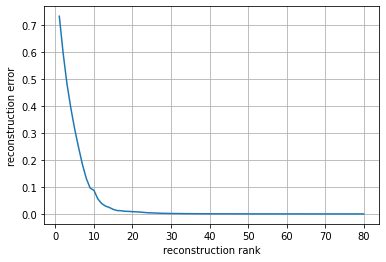

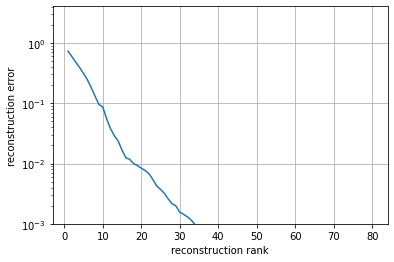

In [8]:
plt.grid()
plt.plot(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.show()

plt.grid()
plt.semilogy(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.ylim(1e-3,)
plt.show()